# Analysis of arousal-valence models for Music Emotion Recognition. Evaluation

In this notebook, an analysis of the results of the arousal and valence predictions obtained for the 6 pre-trained ML models and the Spotify annotations is done taking as ground truth the own annotations performed on chunk 003. 

In [18]:
# Install required dependencies
!pip install pyyaml

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Modify the following paths according to your specific locations.

In [20]:
data_root = "/content/drive/MyDrive/AMPLAB/M1_A1/"                              # Main path 
spotify_annotations_root = data_root + "Emotion-AV-annotation-dataset/annotations-spotifyapi_chunks/annotations-spotifyapi.003/"  # Path where the Spotify annotations for chunk 003 are located
my_annotations_root = data_root + "annotations/"                                # Path where my own annotations for chunk 003 are located
DATAFRAME_FILENAME = "dataframe_predictionsAV.csv"                              # Path where the .csv file of the previous notebook is located

In [21]:
# Basic imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import yaml

In [22]:
def listdirs(rootdir):
  'This function returns all the files/folders inside a given directory'
  list_subdirectories = []
  for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    list_subdirectories.append(d)
  return list_subdirectories

Let's first read the .csv file obtained in the previous notebook, with all the arousal and valence predictions for each of the 6 pre-trained models. 

In [23]:
df = pd.read_csv(DATAFRAME_FILENAME, index_col=0)
display(df)

,Audio Filename,Valence DEAM-Effnet-Discogs,Arousal DEAM-Effnet-Discogs,Valence EmoMusic-Effnet-Discogs,Arousal EmoMusic-Effnet-Discogs,Valence DEAM-MusiCNN,Arousal DEAM-MusiCNN,Valence EmoMusic-MusiCNN,Arousal EmoMusic-MusiCNN,Valence DEAM-VGGish,Arousal DEAM-VGGish,Valence EmoMusic-VGGish,Arousal EmoMusic-VGGish
0,0Y3lmI2xyEOjJXld4zEo5y,5.053731,4.580407,5.329504,5.093254,5.052995,4.563761,4.764217,4.961343,4.549532,4.518157,4.823785,4.873757
1,0l8tol0rUlorDx5qpxQslV,6.373390,4.966892,5.009083,6.233425,6.647532,5.633275,4.112745,6.664200,5.959528,5.243277,5.110380,6.618561
2,0lE400SRtjUmLk37qkt77q,6.933169,6.104311,5.994286,7.235547,6.433623,5.767739,5.086336,6.725953,6.115556,5.719363,5.490141,6.660627
3,0lTQgId3gmoTrrCad2YjpT,6.560664,5.585373,5.783336,6.709685,6.482942,5.814793,5.182550,6.642734,5.989779,5.705398,5.586069,6.473175
4,0lhDwEGQ6IDlGrko5T7Ei2,5.150180,5.394093,5.928362,5.184996,5.711140,5.894861,5.880081,6.077621,5.126540,5.409609,5.376610,5.718433
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6EDy6U8aPJ8H0ThnRlQLoh,5.001857,5.324827,5.306437,5.125381,5.871858,5.990390,5.852786,6.033081,5.100253,5.474022,5.259453,5.449007
296,6ECBueopn5ikxPo2fMBsvC,7.255096,5.960934,6.544157,7.062794,5.955849,5.567385,4.681593,6.238199,5.907547,5.911810,5.625345,6.360998
297,6EYCCC9yGn1hZBHLPslNl3,5.430592,5.208453,5.268807,5.580257,5.530531,5.458380,4.872940,5.717871,5.481735,5.344978,5.297013,5.738832
298,6E10rK35nbpf8872ZBl93h,7.002251,5.791056,5.922004,6.975983,6.707564,5.704448,4.857583,6.752985,6.119756,5.606295,5.254521,6.637562


In [24]:
df.describe()

,Valence DEAM-Effnet-Discogs,Arousal DEAM-Effnet-Discogs,Valence EmoMusic-Effnet-Discogs,Arousal EmoMusic-Effnet-Discogs,Valence DEAM-MusiCNN,Arousal DEAM-MusiCNN,Valence EmoMusic-MusiCNN,Arousal EmoMusic-MusiCNN,Valence DEAM-VGGish,Arousal DEAM-VGGish,Valence EmoMusic-VGGish,Arousal EmoMusic-VGGish
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,5.350197,5.165032,5.537002,5.272156,5.358635,5.324314,5.336642,5.393538,5.156652,5.155573,5.243311,5.364090
std,0.797615,0.649392,0.713756,0.847168,0.843312,0.777468,0.781560,0.934766,0.656530,0.585882,0.567974,0.802221
min,3.348569,3.438585,3.314077,3.218079,2.934236,3.046108,3.256992,2.440170,3.437319,3.610672,3.531475,3.173759
25%,4.760094,4.754012,5.020129,4.668108,4.832905,4.822242,4.842899,4.828578,4.772566,4.881832,4.914457,4.888661
50%,5.297199,5.197150,5.521152,5.298294,5.465917,5.348410,5.280509,5.489466,5.231264,5.214887,5.299330,5.499152
75%,5.865182,5.604524,5.991873,5.754749,5.968762,5.890611,5.887687,6.053434,5.594927,5.535586,5.621881,5.928448
max,8.329268,7.490031,7.601197,8.173465,7.350657,7.191173,7.623377,7.374743,7.444948,7.366662,6.956647,7.794415


## Evaluation

Let's now compute the accuracy of each of the models, including the Spotify one, comparing the predictions of arousal and valence to the own annotations (as ground truth). For this, let's create 2 different Pandas DataFrames to store the accuracy results for arousal and valence, respectively.

In [25]:
my_annotation_files = listdirs(my_annotations_root)                             # Get the own annotation files 

# Create 2 DataFrames for storing arousal and valence results
model_names = ["DEAM-Effnet-Discogs", "EmoMusic-Effnet-Discogs", "DEAM-MusiCNN",
                "EmoMusic-MusiCNN", "DEAM-VGGish", "EmoMusic-VGGish", "Spotify"]
df_arousalEval = pd.DataFrame(columns=model_names)
df_valenceEval = pd.DataFrame(columns=model_names)

Let's define some important variables to be used for evaluation. Two different strategies are used for computing the accuracy metrics:
1.   Excluding incomplete pairs: not considering those annotations containing "not_selected" value for "higher_arousal" or "higher_valence", which would correspond to unsure cases, since for unsure cases I de-selected the corresponding arousal or valence option.
2.   Excluding incomplete pairs and pairs which form inconsistent triplets: not considering incomplete pairs (previous strategy) + not considering pairs forming inconsistent triplets, like arousal of A > arousal of B, arousal of B > arousal of C, but arousal of A < arousal of C.



In [26]:
num_annotation_files = len(my_annotation_files)                      # Number of annotation files (should be 300)
num_annotation_complete_arousal = 0                                  # To count the number of arousal pairs which are complete (with not "not_selected")
num_annotation_complete_valence = 0                                  # To count the number of valence pairs which are complete (with not "not_selected")
num_annotation_ok_triplets_arousal = dict.fromkeys(model_names)      # To count the number of arousal pairs that are complete and form a consistent triplet 
num_annotation_ok_triplets_valence = dict.fromkeys(model_names)      # To count the number of valence pairs that are complete and form a consistent triplet
arousal_evaluation = dict.fromkeys(model_names)                      # To store the percentage of correct arousal pairs when using the first evaluation strategy              
arousal_evaluation_triplets = dict.fromkeys(model_names)             # To store the percentage of correct arousal pairs when using the second evaluation strategy
valence_evaluation = dict.fromkeys(model_names)                      # To store the percentage of correct valence pairs when using the first evaluation strategy 
valence_evaluation_triplets = dict.fromkeys(model_names)             # To store the percentage of correct valence pairs when using the second evaluation strategy

# Initialize dictionaries to 0
for key in arousal_evaluation.keys():
  num_annotation_ok_triplets_arousal[key] = 0
  num_annotation_ok_triplets_valence[key] = 0
  arousal_evaluation[key] = 0
  arousal_evaluation_triplets[key] = 0
  valence_evaluation[key] = 0
  valence_evaluation_triplets[key] = 0 

In [27]:
num_annotation = 1                       # Number of annotation files analysed

annotation_files_triplets = []           # For storing already analysed files forming part of the same triplet

# Flags to be used during the evaluation
arousal_triplet_complete = False
arousal_triplet_ok = False
arousal_triplet_check = False
valence_triplet_complete = False
valence_triplet_ok = False
arousal_triplet_check = False

for annotation_filename in my_annotation_files:
  if annotation_filename in annotation_files_triplets:                          # If it was already analysed keep on iterating
    continue
  else:
    # Define lists for saving the arousal and valence triplet values, e.g. "aab"
    higher_arousal_triplet = []
    higher_arousal_triplet_model = []
    higher_valence_triplet = []
    higher_valence_triplet_model = []

    # First file in triplet (files A and B)
    annotation_filename_short = annotation_filename.split('/')[-1]
    split_name = annotation_filename_short.split("-")
    a = split_name[3]                                                           # Get name of file a
    b = split_name[-1].split('.')[0]                                            # Get name of file b
    # Get second and third filename in the triplet
    second_annotation_filename = "\n".join(s for s in my_annotation_files if ((a in s) and (s != annotation_filename)))
    third_annotation_filename = "\n".join(s for s in my_annotation_files if ((b in s) and (s != annotation_filename)))
    # Append them to annotation_files_triplets so that they are not longer analyzed in the loop
    annotation_files_triplets.append(annotation_filename)
    annotation_files_triplets.append(second_annotation_filename)
    annotation_files_triplets.append(third_annotation_filename)
    # First annotation file of the triplet
    print('Annotation file [{0}/{1}]'.format(num_annotation, num_annotation_files))
    num_annotation += 1
    f = open(annotation_filename)                                               # Open annotation file
    annotations = json.load(f)
    hA = annotations["higher_arousal"]                                          # Value of "higher_arousal"
    hV = annotations["higher_valence"]                                          # Value of "higher_valence"
    # Save arousal triplet values for the first annotation file
    if ((hA == "a") or (hA == "b")): higher_arousal_triplet.append(hA)          
    elif hA == "equivalent": higher_arousal_triplet.append("e")                 # If "equivalent" append "e"
    elif hA == "not_selected": higher_arousal_triplet.append("0")               # if "not_selected" append "0"
    # Save valence triplet values for the first annotation file
    if ((hV == "a") or (hV == "b")): higher_valence_triplet.append(hA)
    elif hV == "equivalent": higher_valence_triplet.append("e")                 # If "equivalent" append "e"
    elif hV == "not_selected": higher_valence_triplet.append("0")               # if "not_selected" append "0
 
    # Second file in triplet (files A and C)
    print('Annotation file [{0}/{1}]'.format(num_annotation, num_annotation_files))
    num_annotation += 1
    f = open(second_annotation_filename)                                        # Open annotation file
    annotations = json.load(f)
    hA = annotations["higher_arousal"]                                          # Value of "higher_arousal"
    hV = annotations["higher_valence"]                                          # Value of "higher_valence"
    second_annotation_filename_short = second_annotation_filename.split('/')[-1]
    split_name = second_annotation_filename_short.split("-")
    if split_name[3] == a:                                                      # If the order of the filename is A-C
      c = split_name[-1].split('.')[0]                                          # Get name of file c
      # Save arousal triplet values for the second annotation file
      if hA == "a": higher_arousal_triplet.append("a")
      elif hA == "b": higher_arousal_triplet.append("c")
      # Save valence triplet values for the second annotation file
      if hV == "a": higher_valence_triplet.append("a")
      elif hV == "b": higher_valence_triplet.append("c")
    else:                                                                       # If the order of the filename is C-A
      c = split_name[3]                                                         # Get name of file c
      # Save arousal triplet values for the second annotation file
      if hA == "a": higher_arousal_triplet.append("c")
      elif hA == "b": higher_arousal_triplet.append("a")
      # Save valence triplet values for the second annotation file
      if hV == "a": higher_valence_triplet.append("c")
      elif hV == "b": higher_valence_triplet.append("a")
    if hA == "equivalent": higher_arousal_triplet.append("e")                   # If "equivalent" append "e"
    elif hA == "not_selected": higher_arousal_triplet.append("0")               # if "not_selected" append "0
    if hV == "equivalent": higher_valence_triplet.append("e")                   # If "equivalent" append "e"
    elif hV == "not_selected": higher_valence_triplet.append("0")               # if "not_selected" append "0 

    # Third file in triplet (files B and C)
    print('Annotation file [{0}/{1}]'.format(num_annotation, num_annotation_files))
    num_annotation += 1
    f = open(third_annotation_filename)                                         # Open annotation file
    annotations = json.load(f)
    hA = annotations["higher_arousal"]                                          # Value of "higher_arousal"
    hV = annotations["higher_valence"]                                          # Value of "higher_valence"
    third_annotation_filename_short = third_annotation_filename.split('/')[-1]
    split_name = third_annotation_filename_short.split("-")
    if split_name[3] == b:                                                      # If the order of the filename is B-C
      # Save arousal triplet values for the third annotation file
      if hA == "a": higher_arousal_triplet.append("b")
      elif hA == "b": higher_arousal_triplet.append("c")
      # Save valence triplet values for the third annotation file
      if hV == "a": higher_valence_triplet.append("b")
      elif hV == "b": higher_valence_triplet.append("c")
    else:                                                                       # If the order of the filename is C-B
      # Save arousal triplet values for the third annotation file
      if hA == "a": higher_arousal_triplet.append("c")
      elif hA == "b": higher_arousal_triplet.append("b")
      # Save valence triplet values for the third annotation file
      if hV == "a": higher_valence_triplet.append("c")
      elif hV == "b": higher_valence_triplet.append("b")
    if hA == "equivalent": higher_arousal_triplet.append("e")                   # If "equivalent" append "e"
    elif hA == "not_selected": higher_arousal_triplet.append("0")               # if "not_selected" append "0
    if hV == "equivalent": higher_valence_triplet.append("e")                   # If "equivalent" append "e"
    elif hV == "not_selected": higher_valence_triplet.append("0")               # if "not_selected" append "0

    # Set the complete FLAG to True is there is any "0" ("not_selected") in the triplet values
    if "0" not in higher_arousal_triplet: arousal_triplet_complete = True      
    if "0" not in higher_valence_triplet: valence_triplet_complete = True
    
    # Consistent triplets
    case_ok = ["aab", "aac", "bab", "bcb", "bcc", "acc", "aae", "bce", "aec", "beb", "eab", "ecc", "eee"]
    # Inconsistent triplets
    case_nok = ["bac", "acb", "bae", "ace", "aeb", "bec", "eac", "ecb"] 
    # Triplets that should be checked whether consistent or inconsistent for each model predictions
    case_check = ["aee", "bee", "eeb", "eec", "eae", "ece"]

    # Set FLAGS for arousal
    if arousal_triplet_complete:                                                # If complete triplet
      arousal_triplet_case = higher_arousal_triplet[0] + higher_arousal_triplet[1] + higher_arousal_triplet[2]
      if arousal_triplet_case in case_nok:                                      # If inconsistent triplet
        arousal_triplet_ok = False
        arousal_triplet_check = False
      elif arousal_triplet_case in case_check:                                  # If triplet needs to be further checked
        arousal_triplet_ok = False
        arousal_triplet_check = True
      else:                                                                     # If consistent triplet
        arousal_triplet_ok = True
        arousal_triplet_check = False
    else:                                                                       # If incomplete triplet
      arousal_triplet_ok = False
      arousal_triplet_check = False
    # Set FLAGS for valence
    if valence_triplet_complete:                                                # If complete triplet
      valence_triplet_case = higher_valence_triplet[0] + higher_valence_triplet[1] + higher_valence_triplet[2]
      if valence_triplet_case in case_nok:                                      # If inconsistent triplet
        valence_triplet_ok = False
        valence_triplet_check = False 
      elif valence_triplet_case in case_check:                                  # If triplet needs to be further checked
        valence_triplet_ok = False
        valence_triplet_check = True
      else:                                                                     # If consistent triplet
        valence_triplet_ok = True
        valence_triplet_check = False
    else:                                                                       # If incomplete triplet
      valence_triplet_ok = False
      valence_triplet_check = False
    
    if arousal_triplet_complete or valence_triplet_complete:                    # Read annotation files any triplet is complete
      # Get DataFrame rows for the a, b and c files of the triplet
      a_pretrainedModels = df.loc[df["Audio Filename"] == a]                    
      b_pretrainedModels = df.loc[df["Audio Filename"] == b]
      c_pretrainedModels = df.loc[df["Audio Filename"] == c]
      
      # Get the Spotify arousal and valence annotations for files a, b and c
      Spotify_folders = listdirs(spotify_annotations_root)
      for Spotify_folder in Spotify_folders:
        Spotify_annotation_files = listdirs(Spotify_folder + "/")
        for Spotify_annotation_file in Spotify_annotation_files:
          Spotify_annotation_filename = Spotify_annotation_file.split("/")[-1].split('.')[0]
          if Spotify_annotation_filename == a:
            a_Spotify = Spotify_annotation_file
          elif Spotify_annotation_filename == b:
            b_Spotify = Spotify_annotation_file
          elif Spotify_annotation_filename == c:
            c_Spotify = Spotify_annotation_file
      with open(a_Spotify, "r") as file:
        a_spotify_annotations = yaml.load(file)
        a_arousal_Spotify = a_spotify_annotations["audio_features"]["energy"]
        a_valence_Spotify = a_spotify_annotations["audio_features"]["valence"]
      with open(b_Spotify, "r") as file:
        b_spotify_annotations = yaml.load(file) 
        b_arousal_Spotify = b_spotify_annotations["audio_features"]["energy"]
        b_valence_Spotify = b_spotify_annotations["audio_features"]["valence"]
      with open(c_Spotify, "r") as file:
        c_spotify_annotations = yaml.load(file) 
        c_arousal_Spotify = c_spotify_annotations["audio_features"]["energy"]
        c_valence_Spotify = c_spotify_annotations["audio_features"]["valence"]

      # If there is no "0" in the triplet values, add 1 to the number of annotation pairs completed (evaluation strategy 1)
      if ((higher_arousal_triplet[0] == "a") or (higher_arousal_triplet[0] == "b") or
          (higher_arousal_triplet[0] == "e")):
        num_annotation_complete_arousal += 1
      if ((higher_arousal_triplet[1] == "a") or (higher_arousal_triplet[1] == "c") or
          (higher_arousal_triplet[1] == "e")):
        num_annotation_complete_arousal += 1
      if ((higher_arousal_triplet[2] == "b") or (higher_arousal_triplet[2] == "c") or
          (higher_arousal_triplet[2] == "e")):
        num_annotation_complete_arousal += 1
      if ((higher_valence_triplet[0] == "a") or (higher_valence_triplet[0] == "b") or
          (higher_valence_triplet[0] == "e")):
        num_annotation_complete_valence += 1
      if ((higher_valence_triplet[1] == "a") or (higher_valence_triplet[1] == "c") or
          (higher_valence_triplet[1] == "e")):
        num_annotation_complete_valence += 1
      if ((higher_valence_triplet[2] == "b") or (higher_valence_triplet[2] == "c") or
          (higher_valence_triplet[2] == "e")):
        num_annotation_complete_valence += 1

      # Iterate over the different models
      for model in arousal_evaluation.keys():
        if model == "Spotify":                                                  # Spotify model
          a_arousal = a_arousal_Spotify
          a_valence = a_valence_Spotify
          b_arousal = b_arousal_Spotify
          b_valence = b_valence_Spotify
          c_arousal = c_arousal_Spotify
          c_valence = c_valence_Spotify
        else:                                                                   # Pre-trained models
          a_arousal = a_pretrainedModels["Arousal " + model].values[0]
          a_valence = a_pretrainedModels["Valence " + model].values[0]
          b_arousal = b_pretrainedModels["Arousal " + model].values[0]
          b_valence = b_pretrainedModels["Valence " + model].values[0]
          c_arousal = c_pretrainedModels["Arousal " + model].values[0]
          c_valence = c_pretrainedModels["Valence " + model].values[0]
        
        # Evaluate each of the 3 annotation pairs for arousal and valence
        if ((((higher_arousal_triplet[0] == "a") and (a_arousal > b_arousal)) or 
            ((higher_arousal_triplet[0] == "b") and (b_arousal > a_arousal)) or 
              ((higher_arousal_triplet[0]) == "e") and (abs(a_arousal - b_arousal) <= 0.1))):
          arousal_evaluation[model] += 1                                        # (Evaluation strategy 1) If correct predictions, add 1 
          if arousal_triplet_ok: arousal_evaluation_triplets[model] += 1        # (Evaluation strategy 2) If also consistent triplet, add also 1 
        if ((((higher_valence_triplet[0] == "a") and (a_valence > b_valence)) or 
            ((higher_valence_triplet[0] == "b") and (b_valence > a_valence)) or 
              ((higher_valence_triplet[0]) == "e") and (abs(a_valence - b_valence) <= 0.1))):
          valence_evaluation[model] += 1                                        # (Evaluation strategy 1) If correct predictions, add 1 
          if valence_triplet_ok: valence_evaluation_triplets[model] += 1        # (Evaluation strategy 2) If also consistent triplet, add also 1 
            
        if ((((higher_arousal_triplet[1] == "a") and (a_arousal > c_arousal)) or 
            ((higher_arousal_triplet[1] == "c") and (c_arousal > a_arousal)) or 
              ((higher_arousal_triplet[1]) == "e") and (abs(a_arousal - c_arousal) <= 0.1))):
          arousal_evaluation[model] += 1                                        # (Evaluation strategy 1) If correct predictions, add 1 
          if arousal_triplet_ok: arousal_evaluation_triplets[model] += 1        # (Evaluation strategy 2) If also consistent triplet, add also 1 
        if ((((higher_valence_triplet[1] == "a") and (a_valence > c_valence)) or 
            ((higher_valence_triplet[1] == "c") and (c_valence > a_valence)) or 
              ((higher_valence_triplet[1]) == "e") and (abs(a_valence - c_valence) <= 0.1))):
          valence_evaluation[model] += 1                                        # (Evaluation strategy 1) If correct predictions, add 1 
          if valence_triplet_ok: valence_evaluation_triplets[model] += 1        # (Evaluation strategy 2) If also consistent triplet, add also 1 

        if ((((higher_arousal_triplet[2] == "b") and (b_arousal > c_arousal)) or 
            ((higher_arousal_triplet[2] == "c") and (c_arousal > b_arousal)) or 
              ((higher_arousal_triplet[2]) == "e") and (abs(b_arousal - c_arousal) <= 0.1))):
          arousal_evaluation[model] += 1                                        # (Evaluation strategy 1) If correct predictions, add 1
          if arousal_triplet_ok: arousal_evaluation_triplets[model] += 1        # (Evaluation strategy 2) If also consistent triplet, add also 1 
        if ((((higher_valence_triplet[2] == "b") and (b_valence > c_valence)) or 
            ((higher_valence_triplet[2] == "c") and (c_valence > b_valence)) or 
              ((higher_valence_triplet[2]) == "e") and (abs(b_valence - c_valence) <= 0.1))):
          valence_evaluation[model] += 1                                        # (Evaluation strategy 1) If correct predictions, add 1
          if valence_triplet_ok: valence_evaluation_triplets[model] += 1        # (Evaluation strategy 2) If also consistent triplet, add also 1 

        if arousal_triplet_ok:                                                  # If consistent triplet
          num_annotation_ok_triplets_arousal[model] += 3                        # Add 3 to the number of annotation pairs
        elif arousal_triplet_check:                                             # Check ambiguous triplets
          if ((arousal_triplet_case == "aee") and ((a_arousal - c_arousal) <= 0.1) and ((c_arousal - b_arousal) <= 0.1)):
              arousal_evaluation_triplets[model] += 1
              num_annotation_ok_triplets_arousal[model] += 1
          elif ((arousal_triplet_case == "bee") and ((b_arousal - c_arousal) <= 0.1) and ((c_arousal - a_arousal) <= 0.1)):
              arousal_evaluation_triplets[model] += 1
              num_annotation_ok_triplets_arousal[model] += 1
          elif ((arousal_triplet_case == "eeb") and ((b_arousal - a_arousal) <= 0.1) and ((a_arousal - c_arousal) <= 0.1)):
              arousal_evaluation_triplets[model] += 1
              num_annotation_ok_triplets_arousal[model] += 1
          elif ((arousal_triplet_case == "eec") and ((c_arousal - a_arousal) <= 0.1) and ((a_arousal - b_arousal) <= 0.1)):
              arousal_evaluation_triplets[model] += 1
              num_annotation_ok_triplets_arousal[model] += 1
          elif ((arousal_triplet_case == "eae") and ((a_arousal - b_arousal) <= 0.1) and ((b_arousal - c_arousal) <= 0.1)):
              arousal_evaluation_triplets[model] += 1
              num_annotation_ok_triplets_arousal[model] += 1
          elif ((arousal_triplet_case == "ece") and ((c_arousal - b_arousal) <= 0.1) and ((b_arousal - a_arousal) <= 0.1)):
              arousal_evaluation_triplets[model] += 1
              num_annotation_ok_triplets_arousal[model] += 1
        if valence_triplet_ok:
          num_annotation_ok_triplets_valence[model] += 3
        elif valence_triplet_check:
          if ((valence_triplet_case == "aee") and ((a_valence - c_valence) <= 0.1) and ((c_valence - b_valence) <= 0.1)):
              valence_evaluation_triplets[model] += 1
              num_annotation_ok_triplets_valence[model] += 1
          elif ((valence_triplet_case == "bee") and ((b_valence - c_valence) <= 0.1) and ((c_valence - a_valence) <= 0.1)):
              valence_evaluation_triplets[model] += 1
              num_annotation_ok_triplets_valence[model] += 1
          elif ((valence_triplet_case == "eeb") and ((b_valence - a_valence) <= 0.1) and ((a_valence - c_valence) <= 0.1)):
              valence_evaluation_triplets[model] += 1
              num_annotation_ok_triplets_valence[model] += 1
          elif ((valence_triplet_case == "eec") and ((c_valence - a_valence) <= 0.1) and ((a_valence - b_valence) <= 0.1)):
              valence_evaluation_triplets[model] += 1
              num_annotation_ok_triplets_valence[model] += 1
          elif ((valence_triplet_case == "eae") and ((a_valence - b_valence) <= 0.1) and ((b_valence - c_valence) <= 0.1)):
              valence_evaluation_triplets[model] += 1
              num_annotation_ok_triplets_valence[model] += 1
          elif ((valence_triplet_case == "ece") and ((c_valence - b_valence) <= 0.1) and ((b_valence - a_valence) <= 0.1)):
              valence_evaluation_triplets[model] += 1
              num_annotation_ok_triplets_valence[model] += 1

print("arousal_evaluation: ", arousal_evaluation)
print("arousal_evaluation_triplets: ", arousal_evaluation_triplets)

# Convert to percentages
for key in arousal_evaluation.keys():
  arousal_evaluation[key] = arousal_evaluation[key]/num_annotation_complete_arousal * 100
  arousal_evaluation_triplets[key] = arousal_evaluation_triplets[key]/num_annotation_ok_triplets_arousal[key] * 100
  valence_evaluation[key] = valence_evaluation[key]/num_annotation_complete_valence * 100
  valence_evaluation_triplets[key] = valence_evaluation_triplets[key]/num_annotation_ok_triplets_valence[key] * 100

# Append to DataFrames
df_arousalEval = df_arousalEval.append(arousal_evaluation, ignore_index = True)
df_arousalEval = df_arousalEval.append(arousal_evaluation_triplets, ignore_index = True)
df_valenceEval = df_valenceEval.append(valence_evaluation, ignore_index = True)
df_valenceEval = df_valenceEval.append(valence_evaluation_triplets, ignore_index = True)

Annotation file [1/300]
Annotation file [2/300]
Annotation file [3/300]
Annotation file [4/300]
Annotation file [5/300]
Annotation file [6/300]
Annotation file [7/300]
Annotation file [8/300]
Annotation file [9/300]
Annotation file [10/300]
Annotation file [11/300]
Annotation file [12/300]
Annotation file [13/300]
Annotation file [14/300]
Annotation file [15/300]
Annotation file [16/300]
Annotation file [17/300]
Annotation file [18/300]
Annotation file [19/300]
Annotation file [20/300]
Annotation file [21/300]
Annotation file [22/300]
Annotation file [23/300]
Annotation file [24/300]
Annotation file [25/300]
Annotation file [26/300]
Annotation file [27/300]
Annotation file [28/300]
Annotation file [29/300]
Annotation file [30/300]
Annotation file [31/300]
Annotation file [32/300]
Annotation file [33/300]
Annotation file [34/300]
Annotation file [35/300]
Annotation file [36/300]
Annotation file [37/300]
Annotation file [38/300]
Annotation file [39/300]
Annotation file [40/300]
Annotatio

Let's save the resultant DataFrames in .csv files.

In [28]:
RESULTS_AROUSAL = "dataframe_resultsArousal.csv"
df_arousalEval.to_csv(RESULTS_AROUSAL)
RESULTS_VALENCE = "dataframe_resultsValence.csv"
df_valenceEval.to_csv(RESULTS_VALENCE)

Print the number of annotation pairs for each strategy.

In [29]:
print("Number of pairs of arousal annotations excluding those marked as unsure: ", num_annotation_complete_arousal)
print("Number of pairs of valence annotations excluding those marked as unsure: ", num_annotation_complete_valence)
print("Number of pairs of arousal annotations excluding those marked as unsure and inconsistent triplets: ", num_annotation_ok_triplets_arousal)
print("Number of pairs of valence annotations excluding those marked as unsure and inconsistent triplets: ",num_annotation_ok_triplets_valence)

Number of pairs of arousal annotations excluding those marked as unsure:  290
Number of pairs of valence annotations excluding those marked as unsure:  282
Number of pairs of arousal annotations excluding those marked as unsure and inconsistent triplets:  {'DEAM-Effnet-Discogs': 267, 'EmoMusic-Effnet-Discogs': 265, 'DEAM-MusiCNN': 266, 'EmoMusic-MusiCNN': 266, 'DEAM-VGGish': 267, 'EmoMusic-VGGish': 268, 'Spotify': 266}
Number of pairs of valence annotations excluding those marked as unsure and inconsistent triplets:  {'DEAM-Effnet-Discogs': 255, 'EmoMusic-Effnet-Discogs': 256, 'DEAM-MusiCNN': 255, 'EmoMusic-MusiCNN': 255, 'DEAM-VGGish': 256, 'EmoMusic-VGGish': 256, 'Spotify': 256}


Display the DataFrames

In [30]:
display(df_arousalEval)

,DEAM-Effnet-Discogs,EmoMusic-Effnet-Discogs,DEAM-MusiCNN,EmoMusic-MusiCNN,DEAM-VGGish,EmoMusic-VGGish,Spotify
0,47.931034,46.551724,50.000000,51.379310,49.310345,51.37931,54.137931
1,48.689139,47.169811,51.503759,53.383459,49.438202,52.61194,54.511278


In [31]:
display(df_valenceEval)

,DEAM-Effnet-Discogs,EmoMusic-Effnet-Discogs,DEAM-MusiCNN,EmoMusic-MusiCNN,DEAM-VGGish,EmoMusic-VGGish,Spotify
0,57.446809,58.865248,57.446809,62.411348,58.156028,58.865248,59.929078
1,56.470588,57.031250,56.078431,61.568627,56.250000,58.984375,59.375000


### Visualizations

Finally, let's represent the results in 2 tables, one for arousal and one for valence.

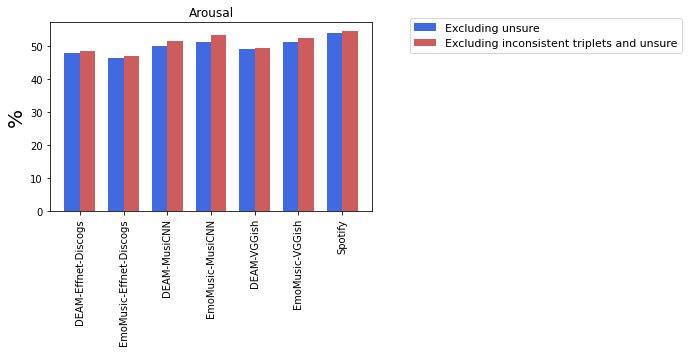

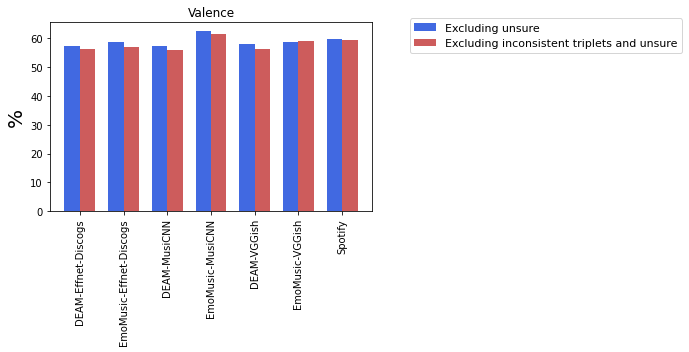

In [32]:
# AROUSAL
xTicks_arousal = arousal_evaluation.keys()
yValues_arousal = arousal_evaluation.values()
xTicks_arousal_triplets = arousal_evaluation_triplets.keys()
yValues_arousal_triplets = arousal_evaluation_triplets.values()
x = np.arange(len(xTicks_arousal))                                # the label locations
width = 0.35                                                      # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, list(yValues_arousal), width, label='Excluding unsure', color="royalblue")
rects2 = ax.bar(x + width/2, list(yValues_arousal_triplets), width, label='Excluding inconsistent triplets and unsure', color="indianred")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%', fontsize=20)
ax.set_title('Arousal')
ax.set_xticks(x)
ax.set_xticklabels(list(xTicks_arousal), rotation='vertical')
ax.legend(fontsize=11, bbox_to_anchor=(1.1, 1.05))

fig.tight_layout()

# VALENCE
xTicks_valence = valence_evaluation.keys()
yValues_valence = valence_evaluation.values()
xTicks_valence_triplets = valence_evaluation_triplets.keys()
yValues_valence_triplets = valence_evaluation_triplets.values()
x = np.arange(len(xTicks_valence))                                # the label locations
width = 0.35                                                      # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, list(yValues_valence), width, label='Excluding unsure', color="royalblue")
rects2 = ax.bar(x + width/2, list(yValues_valence_triplets), width, label='Excluding inconsistent triplets and unsure', color="indianred")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%', fontsize=20)
ax.set_title('Valence')
ax.set_xticks(x)
ax.set_xticklabels(list(xTicks_valence), rotation='vertical')
ax.legend(fontsize=11, bbox_to_anchor=(1.1, 1.05))

fig.tight_layout()

plt.show()